<a href="https://colab.research.google.com/github/KimJunGu9/ADP_ML/blob/main/2_3_DecisionTree(%EC%8B%9C%EA%B0%81%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 의사결정나무 (시각화)

In [2]:
# https://graphviz.org/download/

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image
import pydot
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import os

In [4]:
# iris 데이터의 Species를 분류하는 의사결정나무 분석을 실시하고 오분류표를 만들어보자

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# 훈련셋 평가셋 분리하기

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size = 0.3, random_state=123)

In [10]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(105, 4) (45, 4) (105,) (45,)


In [11]:
# 의사결정나무 모델 실행

iris_clf = DecisionTreeClassifier(max_depth=5)
iris_clf = iris_clf.fit(train_x, train_y)
iris_prediction = iris_clf.predict(test_x)

In [12]:
feature_columns = iris.feature_names

In [13]:
feature_columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

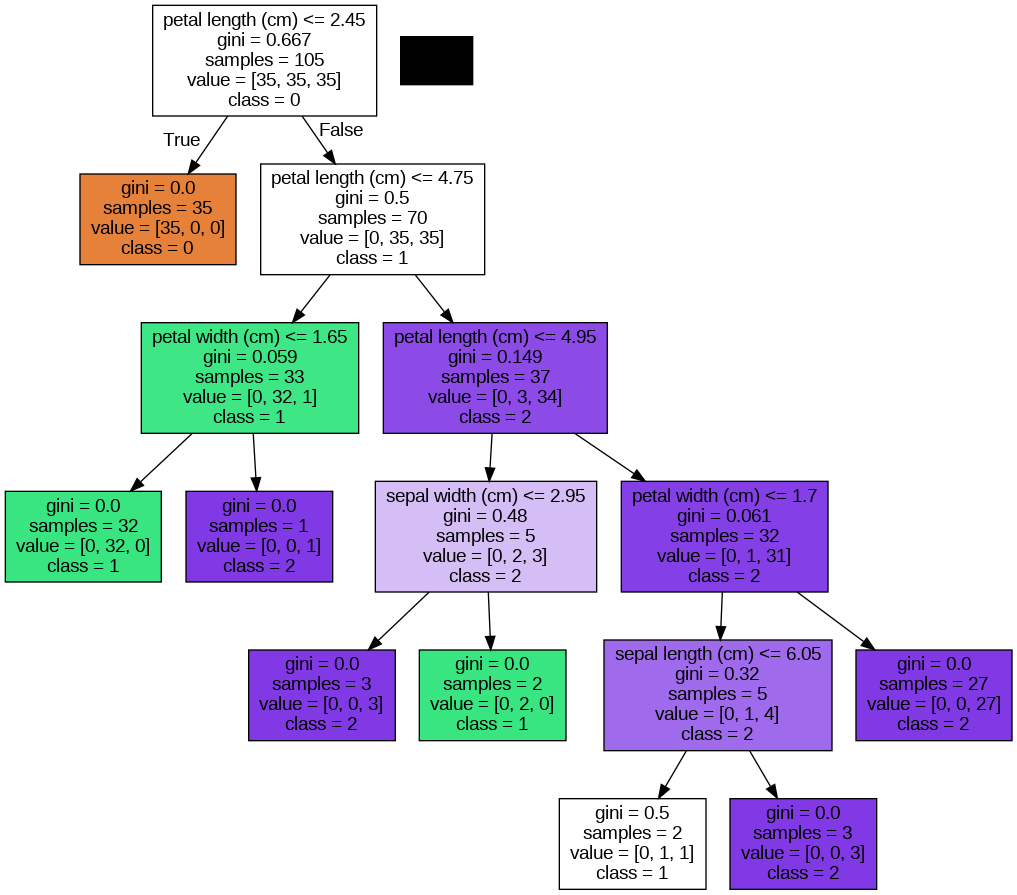

In [14]:
from sklearn import tree
# 의사결정나무 시각화

# 시각화 라이브러리에 삽입해야하는 변수 생성하기
# 원본 데이터의 변수이름을 추출하고, 타겟변수 이름을 0, 1로 설정

feature_names = feature_columns
target_name = np.array(['0', '1', '2'])
#print(target_name) #결과 ['0', '1', '2']

# Graphviz로 의사결정나무 시각화하기
dt_dot_data = tree.export_graphviz(iris_clf, feature_names=feature_names, class_names=target_name, 
                            filled=True,max_depth= 5)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())

In [15]:
# 분류 리포트 생성하기

class_report_iris = classification_report(test_y, iris_prediction)
print(class_report_iris)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
test_y

array([1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2,
       1])

In [18]:
iris_prediction

array([2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2,
       1])

In [19]:
iris_clf.predict_proba(test_x)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [20]:
help(roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics._ranking:

roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)     from prediction scores.
    
    Note: this implementation can be used with binary, multiclass and
    multilabel classification, but some restrictions apply (see Parameters).
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
        True labels or binary label indicators. The binary and multiclass cases
        expect labels with shape (n_samples,) while the multilabel case expects
        binary label indicators with shape (n_samples, n_classes).
    
    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
        Target scores.
    
        * In the binary case, it corresponds to an array 

In [21]:
roc_auc_score(test_y, iris_clf.predict_proba(test_x), multi_class='ovr')

0.9166666666666666